# 实验三：多分类实验对比激活函数
姓名：王恩泰

学号：21114019

In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
from torch.nn import init
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

## **读取数据集**

In [2]:
# 训练集
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets', train=True,
                                                download=False, transform=transforms.ToTensor())
# 测试集
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets', train=False,
                                                download=False, transform=transforms.ToTensor())

# 通过DataLoader读取小批量数据样本
batch_size = 256
num_workers = 0
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
num_workers=num_workers)

# 一、ReLU激活函数

iter: 0, train_loss= 0.008858, test_loss= 0.008631
iter: 0, train_acc= 0.150767, test_acc= 0.179200
iter: 10, train_loss= 0.002669, test_loss= 0.002745
iter: 10, train_acc= 0.758550, test_acc= 0.753600
iter: 20, train_loss= 0.002103, test_loss= 0.002216
iter: 20, train_acc= 0.817867, test_acc= 0.804700
iter: 30, train_loss= 0.001891, test_loss= 0.002036
iter: 30, train_acc= 0.833150, test_acc= 0.819800
iter: 40, train_loss= 0.001780, test_loss= 0.001931
iter: 40, train_acc= 0.843000, test_acc= 0.828300
iter: 49, train_loss= 0.001713, test_loss= 0.001871
iter: 49, train_acc= 0.848833, test_acc= 0.833200


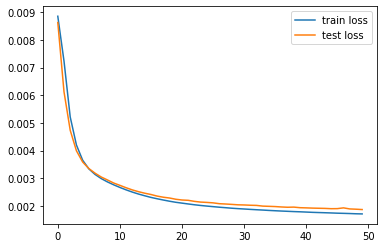

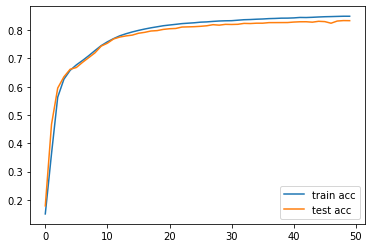

In [3]:
# 1. 构建隐藏层类
class FlattenLayer(torch.nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)

# 2. 模型定义
num_inputs, num_outputs, num_hiddens = 784, 10, 50 # 784个输入参数，10个输出参数（每类的概率）, 256个隐藏层
net = nn.Sequential(
         FlattenLayer(),
         nn.Linear(num_inputs, num_hiddens),
         nn.ReLU(),
         nn.Linear(num_hiddens, num_outputs),
         )
         
# 3. 初始化参数
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

# 4. 设置学习器参数
num_epochs=50
lr=0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
for epoch in range(num_epochs):
    train_loss_sum = 0
    train_acc_sum = 0

    n_train = 0
    for train_x,train_y in train_iter: # 这里不用batch_size
        y_hat = net(train_x)
        # print(y_hat)
        # print(train_y)
        l = loss(y_hat, train_y).sum()
        if optimizer is not None:
            optimizer.zero_grad()
        elif params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        l.backward()
        if optimizer is None:
            SGD(params, lr)
        else:
            optimizer.step()
        train_loss_sum += l.item()
        n_train += train_y.shape[0]
        train_acc_sum += (y_hat.argmax(dim=1) == train_y).sum().item()
    train_loss_list.append(train_loss_sum/n_train)
    train_acc_list.append(train_acc_sum/n_train)

    test_loss_sum = 0
    test_acc_sum = 0
    n_test = 0
    for test_x,test_y in test_iter: 
        y_hat = net(test_x)
        l = loss(y_hat, test_y).sum()
        test_loss_sum += l.item()
        n_test += test_y.shape[0]
        test_acc_sum += (y_hat.argmax(dim=1) == test_y).sum().item()
    test_loss_list.append(test_loss_sum/n_test)
    test_acc_list.append(test_acc_sum/n_test)

    if (epoch % 10 == 0):
        print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
        print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show() 
plt.plot(train_acc_list, label='train acc')
plt.plot(test_acc_list, label='test acc')
plt.legend() 
plt.show()


# 二、Sigmoid激活函数

iter: 0, train_loss= 0.009010, test_loss= 0.009190
iter: 0, train_acc= 0.129217, test_acc= 0.178400
iter: 10, train_loss= 0.005481, test_loss= 0.005468
iter: 10, train_acc= 0.544633, test_acc= 0.562700
iter: 20, train_loss= 0.003877, test_loss= 0.003931
iter: 20, train_acc= 0.657967, test_acc= 0.661400
iter: 30, train_loss= 0.003182, test_loss= 0.003251
iter: 30, train_acc= 0.720583, test_acc= 0.713500
iter: 40, train_loss= 0.002798, test_loss= 0.002879
iter: 40, train_acc= 0.746083, test_acc= 0.737300
iter: 49, train_loss= 0.002585, test_loss= 0.002675
iter: 49, train_acc= 0.762367, test_acc= 0.752200


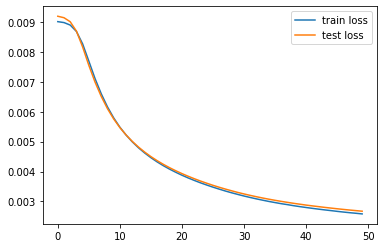

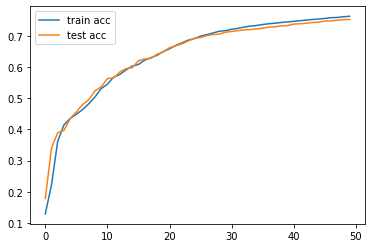

In [4]:
# 1. 构建隐藏层类
class FlattenLayer(torch.nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)

# 2. 模型定义
num_inputs, num_outputs, num_hiddens = 784, 10, 50 # 784个输入参数，10个输出参数（每类的概率）, 256个隐藏层
net = nn.Sequential(
         FlattenLayer(),
         nn.Linear(num_inputs, num_hiddens),
         nn.Sigmoid(),
         nn.Linear(num_hiddens, num_outputs),
         )
         
# 3. 初始化参数
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

# 4. 设置学习器参数
num_epochs=50
lr=0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
for epoch in range(num_epochs):
    train_loss_sum = 0
    train_acc_sum = 0

    n_train = 0
    for train_x,train_y in train_iter: # 这里不用batch_size
        y_hat = net(train_x)
        # print(y_hat)
        # print(train_y)
        l = loss(y_hat, train_y).sum()
        if optimizer is not None:
            optimizer.zero_grad()
        elif params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        l.backward()
        if optimizer is None:
            SGD(params, lr)
        else:
            optimizer.step()
        train_loss_sum += l.item()
        n_train += train_y.shape[0]
        train_acc_sum += (y_hat.argmax(dim=1) == train_y).sum().item()
    train_loss_list.append(train_loss_sum/n_train)
    train_acc_list.append(train_acc_sum/n_train)

    test_loss_sum = 0
    test_acc_sum = 0
    n_test = 0
    for test_x,test_y in test_iter: 
        y_hat = net(test_x)
        l = loss(y_hat, test_y).sum()
        test_loss_sum += l.item()
        n_test += test_y.shape[0]
        test_acc_sum += (y_hat.argmax(dim=1) == test_y).sum().item()
    test_loss_list.append(test_loss_sum/n_test)
    test_acc_list.append(test_acc_sum/n_test)

    if (epoch % 10 == 0):
        print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
        print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show() 
plt.plot(train_acc_list, label='train acc')
plt.plot(test_acc_list, label='test acc')
plt.legend() 
plt.show()

## 3. Tanh激活函数

iter: 0, train_loss= 0.008735, test_loss= 0.008237
iter: 0, train_acc= 0.261800, test_acc= 0.427500
iter: 10, train_loss= 0.002701, test_loss= 0.002762
iter: 10, train_acc= 0.758033, test_acc= 0.753000
iter: 20, train_loss= 0.002097, test_loss= 0.002206
iter: 20, train_acc= 0.815917, test_acc= 0.804200
iter: 30, train_loss= 0.001860, test_loss= 0.001992
iter: 30, train_acc= 0.834817, test_acc= 0.821700
iter: 40, train_loss= 0.001731, test_loss= 0.001872
iter: 40, train_acc= 0.844767, test_acc= 0.831000
iter: 49, train_loss= 0.001654, test_loss= 0.001802
iter: 49, train_acc= 0.851600, test_acc= 0.836200


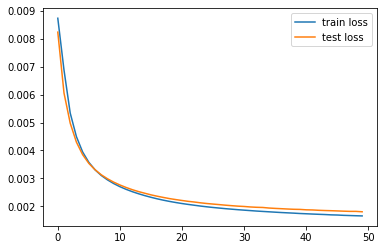

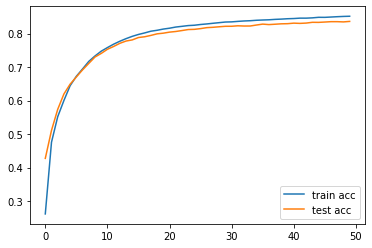

In [5]:
# 1. 构建隐藏层类
class FlattenLayer(torch.nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],-1)

# 2. 模型定义
num_inputs, num_outputs, num_hiddens = 784, 10, 50 # 784个输入参数，10个输出参数（每类的概率）, 256个隐藏层
net = nn.Sequential(
         FlattenLayer(),
         nn.Linear(num_inputs, num_hiddens),
         nn.Tanh(),
         nn.Linear(num_hiddens, num_outputs),
         )
         
# 3. 初始化参数
for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

# 4. 设置学习器参数
num_epochs=50
lr=0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
for epoch in range(num_epochs):
    train_loss_sum = 0
    train_acc_sum = 0

    n_train = 0
    for train_x,train_y in train_iter: # 这里不用batch_size
        y_hat = net(train_x)
        # print(y_hat)
        # print(train_y)
        l = loss(y_hat, train_y).sum()
        if optimizer is not None:
            optimizer.zero_grad()
        elif params is not None and params[0].grad is not None:
            for param in params:
                param.grad.data.zero_()
        l.backward()
        if optimizer is None:
            SGD(params, lr)
        else:
            optimizer.step()
        train_loss_sum += l.item()
        n_train += train_y.shape[0]
        train_acc_sum += (y_hat.argmax(dim=1) == train_y).sum().item()
    train_loss_list.append(train_loss_sum/n_train)
    train_acc_list.append(train_acc_sum/n_train)

    test_loss_sum = 0
    test_acc_sum = 0
    n_test = 0
    for test_x,test_y in test_iter: 
        y_hat = net(test_x)
        l = loss(y_hat, test_y).sum()
        test_loss_sum += l.item()
        n_test += test_y.shape[0]
        test_acc_sum += (y_hat.argmax(dim=1) == test_y).sum().item()
    test_loss_list.append(test_loss_sum/n_test)
    test_acc_list.append(test_acc_sum/n_test)

    if (epoch % 10 == 0):
        print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
        print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
print('iter: %d, train_loss= %f, test_loss= %f' % (epoch, train_loss_sum/n_train, test_loss_sum/n_test))
print('iter: %d, train_acc= %f, test_acc= %f' % (epoch, train_acc_sum/n_train, test_acc_sum/n_test))
plt.plot(train_loss_list, label='train loss')
plt.plot(test_loss_list, label='test loss')
plt.legend() 
plt.show() 
plt.plot(train_acc_list, label='train acc')
plt.plot(test_acc_list, label='test acc')
plt.legend() 
plt.show()